## cl - Cloud fraction in vertical coordinate layer (low clouds)

Low Cloud Fraction (LCF) - maximum cloud fraction from 1000-600 hpa <br>

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
from plotFuncs import *

In [3]:
from myFuncs import *

### one dataset

In [4]:
variable = 'cl'

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:cl, dataset:GFDL-CM3, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:     (time: 360, lat: 36, bnds: 2, lon: 144, lev: 48)
Coordinates:
  * lat         (lat) float64 -35.0 -33.0 -31.0 -29.0 ... 29.0 31.0 33.0 35.0
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lev         (lev) float64 0.9961 0.9874 0.9767 ... 3.801e-05 1.711e-05
  * time        (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables: (12/14)
    average_DT  (time) timedelta64[ns] ...
    average_T1  (time) datetime64[ns] ...
    average_T2  (time) datetime64[ns] ...
    lat_bnds    (time, lat, bnds) float64 ...
    lon_bnds    (time, lon, bnds) float64 ...
    ps          (time, lat, lon) float32 ...
    ...          ...
    lev_bnds    (time, lev, bnds) float64 ...
    a           (time, lev) float64 ...
    a_bnds      (time, lev, bnds) float64 ...
    b           (time, lev) float64 ...
    b_bnds      (time, lev, bnds) float64 ...
    p0          (time) float32 ...
Attributes: (12/27)
    title:                  NOAA GFDL GFDL-CM3, historical (run 1) experiment...
    institute_id:           NOAA GFDL
    source:                 GFDL-CM3 2010 atmosphere: AM3 (AM3p9,C48L48); sea...
    contact:                gfdl.climate.model.info@noaa.gov
    project_id:             CMIP5
    table_id:               Table Amon (31 Jan 2011)
    ...                     ...
    parent_experiment_id:   piControl
    physics_version:        1
    product:                output1
    institution:            NOAA GFDL(201 Forrestal Rd, Princeton, NJ, 08540)
    history:                File was processed by fremetar (GFDL analog of CM...
    parent_experiment_rip:  r1i1p1

In [5]:
data = ds['cl']
data

<xarray.DataArray 'cl' (time: 360, lev: 48, lat: 36, lon: 144)>
[89579520 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lev      (lev) float64 0.9961 0.9874 0.9767 ... 3.801e-05 1.711e-05
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
Attributes:
    cell_methods:      time: mean
    interp_method:     conserve_order1
    long_name:         Cloud Area Fraction
    original_name:     tot_cloud_area
    units:             %
    standard_name:     cloud_area_fraction_in_atmosphere_layer
    original_units:    percent
    cell_measures:     area: areacella
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [6]:
ds['lev']

<xarray.DataArray 'lev' (lev: 48)>
array([9.961099e-01, 9.873945e-01, 9.767074e-01, 9.637827e-01, 9.482209e-01,
       9.295540e-01, 9.072550e-01, 8.807399e-01, 8.493971e-01, 8.126292e-01,
       7.698747e-01, 7.206968e-01, 6.648809e-01, 6.026212e-01, 5.350591e-01,
       4.649418e-01, 3.963630e-01, 3.331552e-01, 2.773648e-01, 2.292632e-01,
       1.882549e-01, 1.535420e-01, 1.243594e-01, 9.999907e-02, 7.981281e-02,
       6.321172e-02, 4.966566e-02, 3.870170e-02, 2.990173e-02, 2.289962e-02,
       1.737780e-02, 1.306353e-02, 9.724891e-03, 7.166759e-03, 5.226664e-03,
       3.770814e-03, 2.690258e-03, 1.897296e-03, 1.322170e-03, 9.100661e-04,
       6.184560e-04, 4.147679e-04, 2.743885e-04, 1.787529e-04, 1.136180e-04,
       6.865516e-05, 3.801024e-05, 1.710525e-05])
Coordinates:
  * lev      (lev) float64 0.9961 0.9874 0.9767 ... 3.801e-05 1.711e-05
Attributes:
    long_name:      hybrid sigma pressure coordinate
    units:          1
    positive:       down
    axis:           Z
    bounds:         lev_bnds
    formula:        p(n,k,j,i) = a(k)*p0 + b(k)*ps(n,j,i)
    formula_terms:  p0: p0 a: a b: b ps: ps
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate

In [7]:
p_hybridSigma = ds.a*ds.p0 + ds.b*ds.ps
p_hybridSigma

<xarray.DataArray (time: 360, lev: 48, lat: 36, lon: 144)>
array([[[[1.01894608e+05, 1.01846304e+05, 1.01776078e+05, ...,
          1.01929760e+05, 1.01935698e+05, 1.01926608e+05],
         [1.01908842e+05, 1.01844686e+05, 1.01756366e+05, ...,
          1.01972110e+05, 1.01971457e+05, 1.01952165e+05],
         [1.01852997e+05, 1.01774849e+05, 1.01672155e+05, ...,
          1.01944741e+05, 1.01933293e+05, 1.01903705e+05],
         ...,
         [9.53060079e+04, 9.76435940e+04, 9.97014663e+04, ...,
          8.87995016e+04, 9.09023548e+04, 9.36012271e+04],
         [9.14276498e+04, 9.54830517e+04, 9.96286721e+04, ...,
          9.20106883e+04, 8.87169719e+04, 9.00606065e+04],
         [9.32008201e+04, 9.36241144e+04, 9.58309605e+04, ...,
          9.96099249e+04, 9.61537795e+04, 9.55944376e+04]],

        [[1.00997530e+05, 1.00949773e+05, 1.00880341e+05, ...,
          1.01032285e+05, 1.01038155e+05, 1.01029169e+05],
         [1.01011603e+05, 1.00948173e+05, 1.00860852e+05, ...,
          1.01074156e+05, 1.01073510e+05, 1.01054436e+05],
         [1.00956390e+05, 1.00879125e+05, 1.00777593e+05, ...,
          1.01047096e+05, 1.01035778e+05, 1.01006525e+05],
...
         [3.93428993e+00, 3.93428993e+00, 3.93428993e+00, ...,
          3.93428993e+00, 3.93428993e+00, 3.93428993e+00],
         [3.93428993e+00, 3.93428993e+00, 3.93428993e+00, ...,
          3.93428993e+00, 3.93428993e+00, 3.93428993e+00],
         [3.93428993e+00, 3.93428993e+00, 3.93428993e+00, ...,
          3.93428993e+00, 3.93428993e+00, 3.93428993e+00]],

        [[1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         ...,
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00],
         [1.84861004e+00, 1.84861004e+00, 1.84861004e+00, ...,
          1.84861004e+00, 1.84861004e+00, 1.84861004e+00]]]])
Coordinates:
  * lev      (lev) float64 0.9961 0.9874 0.9767 ... 3.801e-05 1.711e-05
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8

In [8]:
p_hybridSigma.isel(time=0).sel(lat=1.0,lon=1.25)

<xarray.DataArray (lev: 48)>
array([1.00643028e+05, 9.97601049e+04, 9.86748694e+04, 9.73625298e+04,
       9.57826130e+04, 9.38877065e+04, 9.16244746e+04, 8.89338757e+04,
       8.57541748e+04, 8.20251650e+04, 7.76905610e+04, 7.27068239e+04,
       6.70532907e+04, 6.07507298e+04, 5.39146440e+04, 4.68206485e+04,
       3.98808444e+04, 3.34857659e+04, 2.78492837e+04, 2.30045659e+04,
       1.88885137e+04, 1.54091885e+04, 1.24835684e+04, 1.00408760e+04,
       8.01625684e+03, 6.35080078e+03, 4.99146631e+03, 3.89092334e+03,
       3.00732324e+03, 2.30401050e+03, 1.74918298e+03, 1.31552087e+03,
       9.79789001e+02, 7.22429749e+02, 5.27154541e+02, 3.80544556e+02,
       2.71668335e+02, 1.91722839e+02, 1.33702576e+02, 9.21002350e+01,
       6.26404419e+01, 4.20468979e+01, 2.78422012e+01, 1.81597347e+01,
       1.15712252e+01, 7.03295517e+00, 3.93428993e+00, 1.84861004e+00])
Coordinates:
  * lev      (lev) float64 0.9961 0.9874 0.9767 ... 3.801e-05 1.711e-05
    time     object 1970-01-16 12:00:00
    lat      float64 1.0
    lon      float64 1.25

In [9]:
# In paper by Schiro, the low clouds were calculated from maximum cloud fraction between specified pressure levels after cloud fraction has been interpolated onto 
# 19 pressure levels from the native vertical levels

In [10]:
# could define function that picks out datapoints belonging to range of pressure 1500 <= x < 925, 925 <= x < 850, and so on
# taking the vertical (weighted) mean of those datapoints to form a 2D field at a level between. Then take the maximum of those levels as the cloud fraction. 

def convert_hybrid_to_pressure():
    pressure_levels = xr.DataArray(
        data=[1000.0, 925.0, 850.0, 700.0, 600.0, 500.0, 400.0, 300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 20.0, 10.0, 7.0, 5.0]
        )

In [11]:
# this way I have calculated the maximum cloud fraction between the levels, but I have not interpolated it ot 19 levels first,
# so when multiple levels are averaged they might give a different cloud fraction maximum for each considered level

pressureLevels_high = xr.where((p_hybridSigma<=1.5e5) & (p_hybridSigma>=6e4), 1, 0)
cl_low = data*pressureLevels_high
cl_low = cl_low.max(dim='lev')
cl_low

<xarray.DataArray (time: 360, lat: 36, lon: 144)>
array([[[27.05044937, 25.81873322, 27.25805855, ..., 23.90505219,
         23.65341759, 23.99498749],
        [23.8549881 , 23.17943764, 25.39207268, ..., 20.41243553,
         17.89480209, 20.13912964],
        [22.66699409, 22.58754349, 27.06329536, ..., 19.37248039,
         16.6891346 , 18.21537781],
        ...,
        [ 9.60002136,  9.59393883,  8.24297333, ..., 17.10421371,
         12.53651428,  8.91359806],
        [11.71460056, 12.11118412,  9.53366089, ..., 15.2576313 ,
         16.93921852, 12.1221447 ],
        [19.25851059, 20.93813324, 18.05206108, ..., 11.2214756 ,
         18.24873734, 18.92727661]],

       [[29.1344986 , 27.96412468, 31.46840668, ..., 15.3037281 ,
         19.32481003, 26.2846508 ],
        [33.25057602, 32.7013092 , 31.17487907, ..., 13.58699799,
         20.89051247, 28.63157654],
        [31.13785744, 34.24439621, 32.1296196 , ..., 23.63482285,
         25.27866936, 27.7317028 ],
...
        [ 2.76085925,  3.0324285 ,  3.54466462, ...,  8.72825909,
          5.29851723,  2.25057983],
        [ 7.66718388,  5.70373249,  7.11816454, ..., 17.09144783,
         14.80690861,  9.95819759],
        [18.6152916 , 18.56456947, 19.44859505, ..., 14.05223465,
         16.21538925, 15.63539982]],

       [[19.73769379, 18.78727341, 23.35391998, ..., 22.50784874,
         25.48181725, 22.73347855],
        [19.97073746, 19.57997513, 21.59292412, ..., 23.52774811,
         25.64428902, 22.08229446],
        [22.16387558, 21.33851433, 23.10348129, ..., 27.04696083,
         24.56285667, 21.59626007],
        ...,
        [ 3.0010612 ,  4.85035706,  5.29119301, ...,  6.04300451,
          2.9236114 ,  2.58253145],
        [16.90561104, 12.06151199, 11.24546814, ..., 12.02214622,
         14.28814983, 17.30640411],
        [28.79730034, 33.1945076 , 32.28160858, ..., 10.9329958 ,
         16.47800636, 21.21574402]]])
Coordinates:
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00

In [12]:
cl_low = regrid_conserv(cl_low)
cl_low

<xarray.DataArray (time: 360, lat: 22, lon: 128)>
array([[[2.38626608e+01, 2.27377605e+01, 2.58156073e+01, ...,
         2.05759304e+01, 1.93533899e+01, 1.91266712e+01],
        [2.36160121e+01, 2.51901940e+01, 2.50496664e+01, ...,
         1.91677186e+01, 1.94379905e+01, 2.15470720e+01],
        [3.07589653e+01, 2.93805813e+01, 2.30035287e+01, ...,
         2.22192188e+01, 2.46069317e+01, 2.47928096e+01],
        ...,
        [2.78340397e+00, 4.80574835e+00, 7.32590845e+00, ...,
         1.31824548e+00, 1.42306022e+00, 9.15688334e-01],
        [2.67061313e+00, 4.51072341e+00, 6.92678218e+00, ...,
         4.71014938e+00, 4.04689900e+00, 2.71815368e+00],
        [7.13844040e+00, 7.50546631e+00, 7.27436047e+00, ...,
         1.15172892e+01, 1.15505548e+01, 8.38955248e+00]],

       [[3.11261229e+01, 3.38211344e+01, 3.21678554e+01, ...,
         2.18260050e+01, 2.61561062e+01, 2.90510495e+01],
        [3.11643376e+01, 3.61202218e+01, 3.30209885e+01, ...,
         1.72083851e+01, 1.90940665e+01, 2.27450632e+01],
        [3.53424825e+01, 3.88360474e+01, 3.34890788e+01, ...,
         1.14788965e+01, 1.61008018e+01, 1.96470668e+01],
...
        [7.62849750e-01, 5.01322611e-01, 1.23976335e-01, ...,
         2.28994977e-01, 2.15647457e-01, 6.16166593e-01],
        [5.71105652e-02, 8.47211550e-02, 5.47896653e-02, ...,
         5.19248843e-01, 9.84857739e-02, 8.85224210e-02],
        [1.42278047e+00, 1.50608191e+00, 1.26767448e+00, ...,
         5.80420856e+00, 3.00336414e+00, 1.34409311e+00]],

       [[2.44195525e+01, 2.32760895e+01, 2.37914929e+01, ...,
         2.87120612e+01, 2.70056495e+01, 2.45167008e+01],
        [2.54137530e+01, 2.42985203e+01, 2.67276871e+01, ...,
         3.02676454e+01, 2.68138702e+01, 2.43252202e+01],
        [2.43788510e+01, 2.43219366e+01, 2.69195938e+01, ...,
         2.39561704e+01, 2.26555308e+01, 2.25799814e+01],
        ...,
        [3.67171253e-03, 1.88510782e-02, 1.70872977e-01, ...,
         6.89834276e-04, 5.63175395e-04, 1.80898637e-04],
        [8.65281526e-02, 3.35833294e-01, 8.36334995e-01, ...,
         6.60645370e-02, 2.19176838e-02, 8.88692543e-03],
        [1.15010538e+00, 2.08762902e+00, 3.03136963e+00, ...,
         1.92505008e+00, 1.65381528e+00, 9.15335541e-01]]])
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

In [13]:
data = cl_low

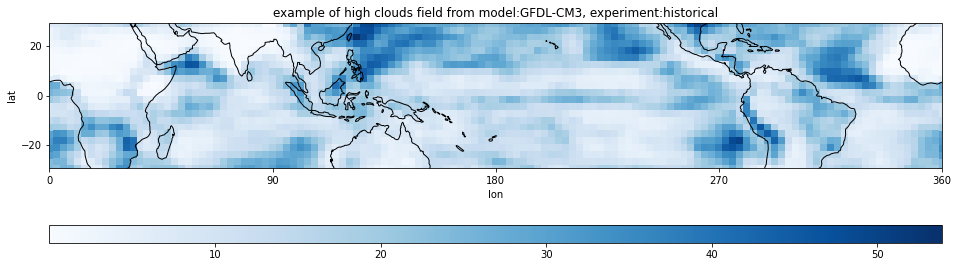

In [14]:
scene = data.isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format('high clouds', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

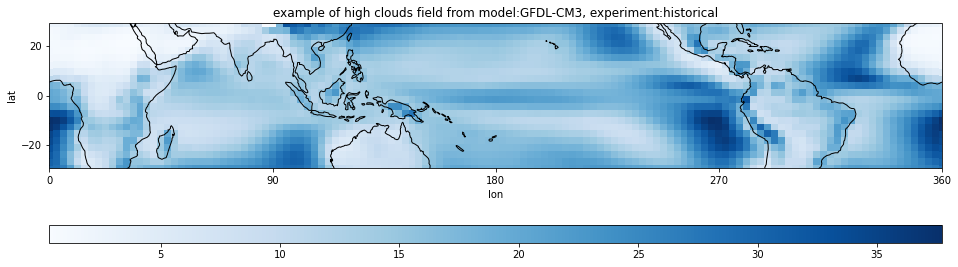

In [15]:
scene = data.mean(dim='time')
title = 'example of {} field from model:{}, experiment:{}'.format('high clouds', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

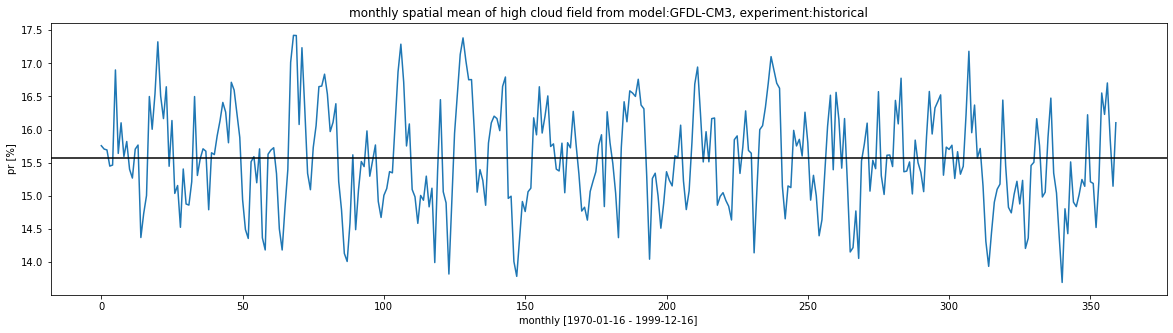

In [16]:
# variable = 'sMean'

timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

aWeights = np.cos(np.deg2rad(data.lat))
y= data.weighted(aWeights).mean(dim=('lat','lon'))
title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_options[0], 'high cloud', datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = 'pr [{}]'.format('%')


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

### comparing datasets

In [17]:
variable = 'cl'

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

observations = [
    ]

datasets = models + observations

experiments =[
    'historical',
    # 'rcp85'
    ]